In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, 'nli/')
from plot import PlotResults
import numpy as np
import torch
from torch import nn
import nltk
nltk.download('punkt')
from matplotlib import pyplot as plt
import os

from setup import load_model, prep_sent, find_checkpoint
from results import Args, NLIResults

[nltk_data] Downloading package punkt to /home/lcur1112/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/lcur1112/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
model_types = ['avg_word_emb', 'uni_lstm', 'bi_lstm', 'max_pool_lstm']

embs = []

for model_type in model_types:
    _, version_path = find_checkpoint(model_type, 'version_0')
    preds =  torch.load(os.path.join(version_path, 'store/test_preds.pt'))
    trues =  torch.load(os.path.join(version_path, 'store/test_trues.pt'))
    emb   = torch.load(os.path.join(version_path, 'store/test_emb.pt'))
    embs.append(emb)

In [4]:
 # device preds into a dictionary based upon the value of true
pred_dict = {true.item() : torch.tensor([]) for true in trues.unique()}
for pred, true in zip(preds, trues):
    pred_dict[true.item()] = torch.cat((pred_dict[true.item()], pred.unsqueeze(0)), dim = 0)

In [5]:
for label, pred in pred_dict.items():
    pred

In [22]:
bins

array([-0.5,  0.5,  1.5,  2.5])

<BarContainer object of 3 artists>

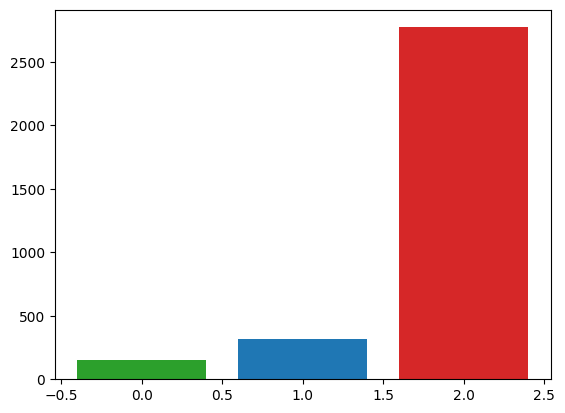

: 

<BarContainer object of 3 artists>

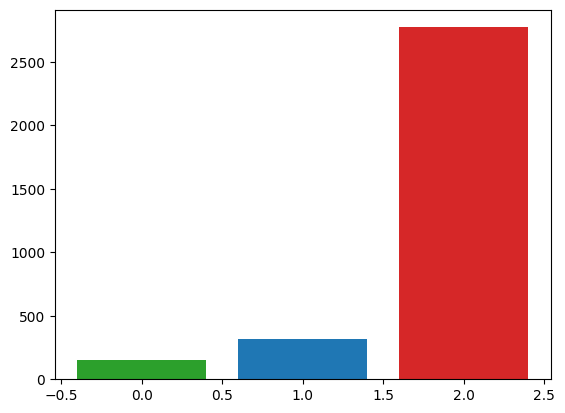

ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 3 colors were provided

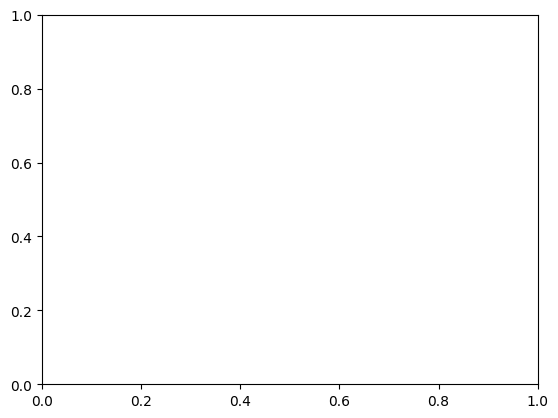

In [29]:
plt.hist( argmax, bins = bins, rwidth = 0.5, align = 'mid', color = ['tab:blue', 'tab:orange', 'tab:green'])

(array([2968.,    0.,    0.,    0.,    0.,  299.,    0.,    0.,    0.,
         101.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

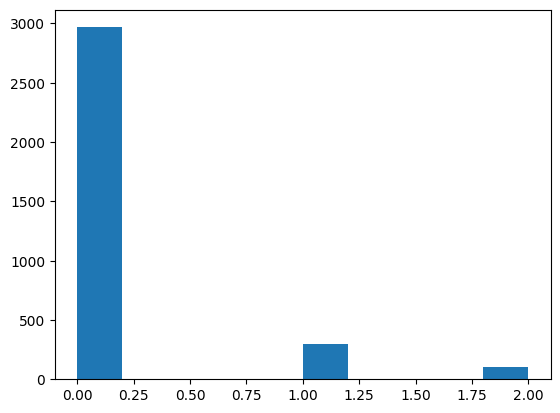

In [7]:
plt.hist( torch.argmax(pred_dict[0], dim = 1) )

In [8]:
mean = torch.mean(emb_u, dim=0)
plt.plot( mean )

NameError: name 'emb_u' is not defined

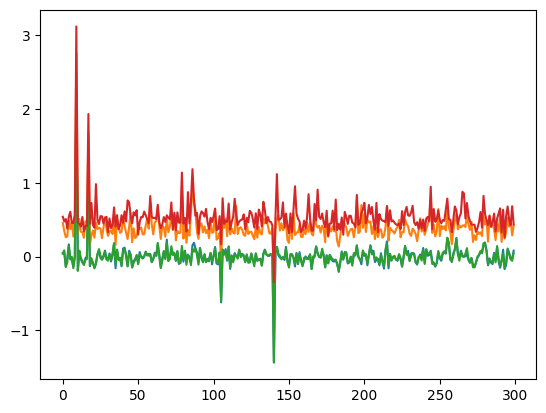

In [ ]:
plt.plot( torch.mean(emb[0], dim=0) )
plt.plot( torch.max(emb[0], dim=0).values  )
plt.plot( torch.mean(emb[1], dim=0) )
plt.plot( torch.max(emb[1], dim=0).values  )

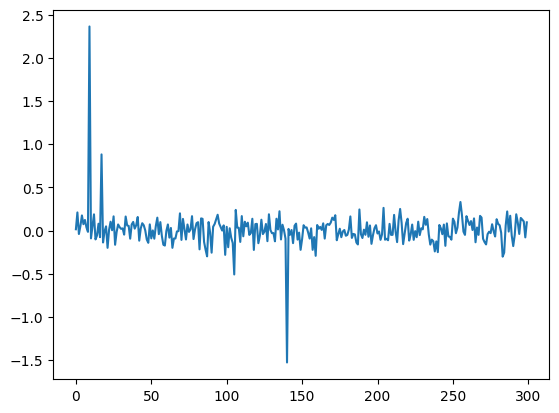

In [ ]:
plt.plot(emb[0,0])

In [ ]:
emb.shape

torch.Size([2, 9824, 300])

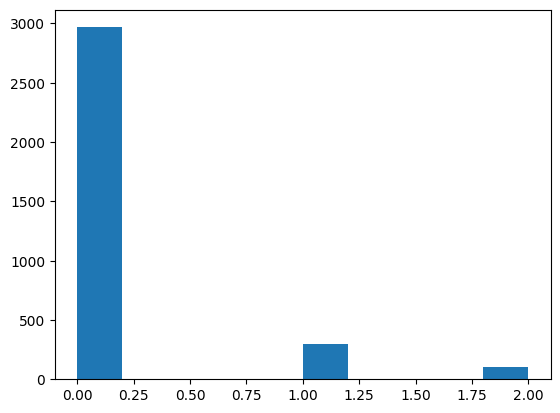

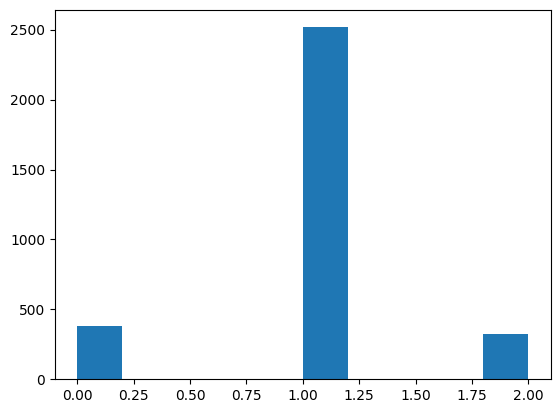

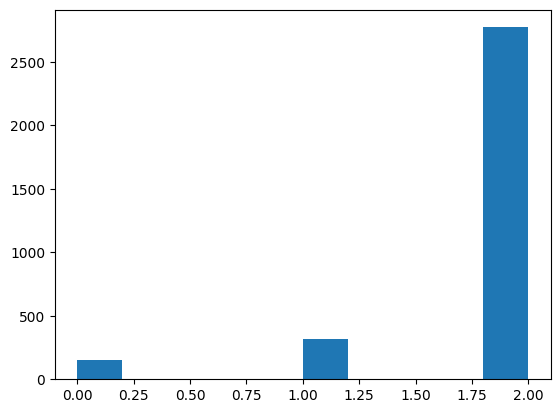

In [ ]:
_, version_path = find_checkpoint('max_pool_lstm', 'version_0')
preds =  torch.load(os.path.join(version_path, 'store/test_preds.pt'))
trues =  torch.load(os.path.join(version_path, 'store/test_trues.pt'))
emb = torch.load(os.path.join(version_path, 'store/test_emb.pt'))

pred_dict = {true.item() : torch.tensor([]) for true in trues.unique()}
for pred, true in zip(preds, trues):
    pred_dict[true.item()] = torch.cat((pred_dict[true.item()], pred.unsqueeze(0)), dim = 0)


for i in range(3):
    plt.hist( torch.argmax(pred_dict[i], dim = 1).numpy() )
    plt.show()